<a href="https://colab.research.google.com/github/JingRu-hi/gameRating/blob/main/%5Btennis%5Dcalibration_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
import os
from scipy.stats import binom


In [ ]:
date = 'Mar15/'
try:
  os.mkdir(date)
except:
  pass

# 1

In [ ]:
!git clone https://github.com/JingRu-hi/gameRating.git
# os.chdir('gameRating/records/')

Cloning into 'gameRating'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 89 (delta 40), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (89/89), done.


In [ ]:
!ls

gameRating  Mar15  sample_data


In [ ]:
path = 'gameRating/records/tennis/'
df2b = pd.read_csv(path+'algorithm2_test_both.txt', delimiter = ", ")
df2cb = pd.read_csv(path+'algorithm2(conserative)_test_both.txt', delimiter = ", ")
df2o = pd.read_csv(path+'algorithm2_test_only.txt', delimiter = ", ")
df2co = pd.read_csv(path+'algorithm2(conserative)_test_only.txt', delimiter = ", ")
df2b.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,game,current_winner1,current_winner2,current_loser1,current_loser2,winner_mean,loser_mean,phat
0,1,105573,105188,105683,133430,3294.487,3005.869,0.8311
1,2,105051,105357,104592,106000,3051.198,2894.794,0.6746
2,3,106401,105591,105428,104693,3088.235,3176.671,0.3422
3,4,105777,105992,103720,111442,3084.779,3146.089,0.3773
4,5,105323,104677,104600,104802,3056.000,3124.557,0.3847


In [ ]:
phat2b = np.array(df2b['phat'])
phat2o = np.array(df2o['phat'])
phat2co = np.array(df2co['phat'])
phat2cb = np.array(df2cb['phat'])

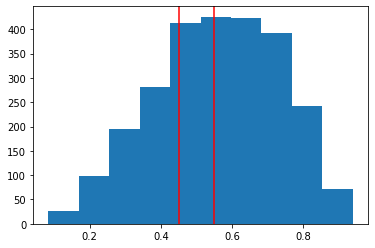

In [ ]:
plt.hist(phat2b)
plt.axvline(x=.45,c='red')
plt.axvline(x=.55,c='red')

In [ ]:
def edge(phat):
  idx = (phat*100)%5==0
  phat_in_interval = phat[idx]
  return phat_in_interval

In [ ]:
edge(phat2b)

array([0.5 , 0.5 , 0.5 , 0.65])

In [ ]:
edge(phat2o)

array([0.4 , 0.9 , 0.25, 0.85])

In [ ]:
edge(phat2cb)

array([0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.4 , 0.5 , 0.5 , 0.4 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.7 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.45,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.75, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.65, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.45, 0.5 ,
       0.5 , 0.5 , 0.75, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

In [ ]:
edge(phat2co)

array([0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.65, 0.45, 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.6 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 ])

# function

In [ ]:
def get_group_phat0(phat, a,b):
  idx = ((phat>=a)&(phat<b)) | ((phat<=round(1-a,2))&(phat>round(1-b,2)))  
  phat_in_interval = phat[idx]
  return phat_in_interval

In [ ]:
def get_group_phat1(phat, a,b):
  idx = ((phat>=a)&(phat<b)) | ((phat<=round(1-a,2))&(phat>round(1-b,2)))  # JingRu
  idx = ((phat>=a)&(phat<=b)) | ((phat<=round(1-a,2))&(phat>=round(1-b,2))) # Prof
  phat_in_interval = phat[idx]
  return phat_in_interval

In [ ]:
def get_group_phat(phat, a,b):
  if b==1: idx = ((phat>=a)&(phat<=b)) | ((phat<=round(1-a,2))&(phat>=round(1-b,2)))  
  else:    idx = ((phat>=a)&(phat< b)) | ((phat<=round(1-a,2))&(phat> round(1-b,2)))  
  phat_in_interval = phat[idx]
  return phat_in_interval

In [ ]:
def get_acc(phat):
  n = len(phat)
  correct = sum(phat>.5)
  return correct, n
def get_CI(phat,a,b):
  phat = get_group_phat(phat,a,b)
  correct, n = get_acc(phat)
  if n==0: return (a+b)/2,(a+b)/2,0
  mean_acc = correct/n
  s_acc = np.sqrt((mean_acc*(1-mean_acc)/n))
  return mean_acc-1.96*s_acc, mean_acc+1.96*s_acc, n

(array([ 75.,  62.,  44.,   0.,   0.,   0.,   0.,  54.,  96., 104.]),
 array([0.4001 , 0.42007, 0.44004, 0.46001, 0.47998, 0.49995, 0.51992,
        0.53989, 0.55986, 0.57983, 0.5998 ]),
 <a list of 10 Patch objects>)

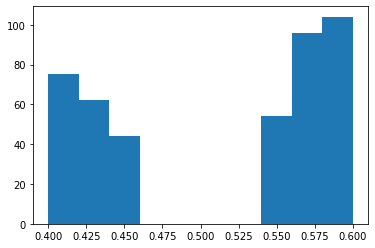

In [ ]:
plt.hist(get_group_phat(phat2b,.55,.6))

In [ ]:
# plt.hist(tmp)
# plt.axvline(x=.45,c='red')
# plt.axvline(x=.55,c='red')

In [ ]:
# plt.hist(get_group_phat(tmp,.55,.6))

In [ ]:
get_CI(phat2b,.55,.6)

(0.5375870027708212, 0.6302290891832019, 435)

In [ ]:
os.chdir('Mar15')
!pwd

# load data and plot

In [ ]:
from scipy.optimize import minimize
def calculate_ratings(data,start_mean = 1500, start_var = 20**2):
    for i in games:
        # 計算rating
            ...
            ...
            ...
        # sum discrepancy
        discrepancy = -np.log(p_iq)
        total_discrepancy += discrepancy
    return prior_ratings, misclassified_rate, (total,count,tie),total_discrepancy  # 多return total_discrepancy
# 記得原本函數只有return 3個結果，所以後面的code記得要讓他多一個物件可以return
## ex. 原本：a, b, c = algorithm2(...) 改成-> a, b, c, d = algorithm2(...)

def optimize_parameter(winners,losers, alg='alg2c',
    start_sig= 100,
    verbose = True, tolerance = 1e-2):
    def fun_to_minimize(theta, alg=alg):
        sig = abs(theta)
        if alg.lower() =='alg2c':
          _, _, _,discrepancy = algorithm2_conservative(winners,losers,start_sig = sig,**kwarg) 
        elif alg.lower() =='alg2':
          _, _, _,discrepancy = algorithm2(winners,losers,start_sig = sig,**kwarg)

        if verbose:
            print('sig: {} ; discrepancy: {}'.format(sig[0],discrepancy[0]))
        return discrepancy
    # cons = ({'type': 'ineq', 'fun': lambda x:  abs(x)})
    opt_result = minimize(fun_to_minimize,
                          np.array([start_sig],dtype='float'),
                          method='Nelder-Mead',
                          tol=tolerance,)
    return {'start_sig':opt_result.x[0]} # parameter


In [ ]:
path = 'gameRating/records/tennis/'
os.listdir(path)

['algorithm2_test_only.txt',
 'algorithm2(conserative)_Train_both.txt',
 'algorithm2_Train_only.txt',
 'algorithm2(conserative)_test_only.txt',
 'algorithm2_test_both.txt',
 'algorithm2(conserative)_test_both.txt',
 'algorithm2(conserative)_Train_only.txt',
 'algorithm2_Train_both.txt',
 'readme.md']

gameRating/records/tennis/algorithm2_test_only.txt


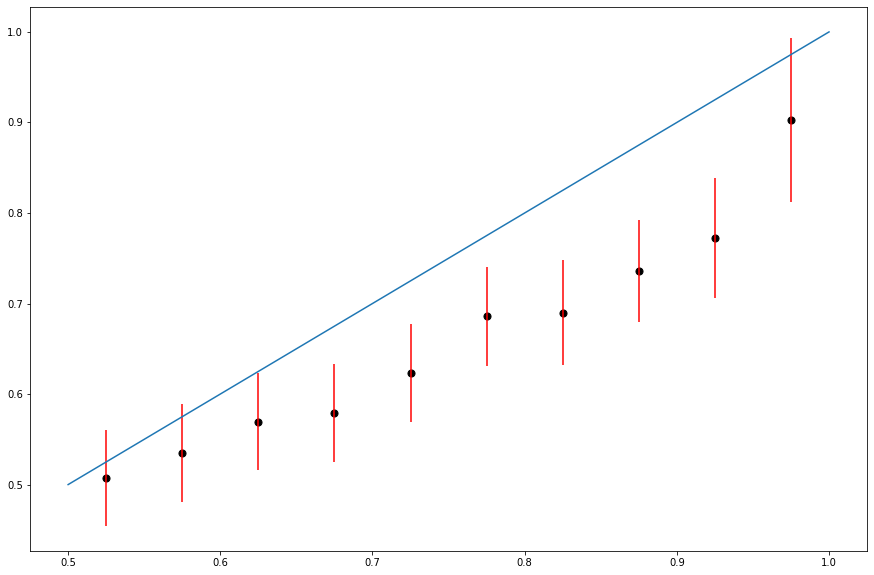

gameRating/records/tennis/algorithm2(conserative)_test_only.txt


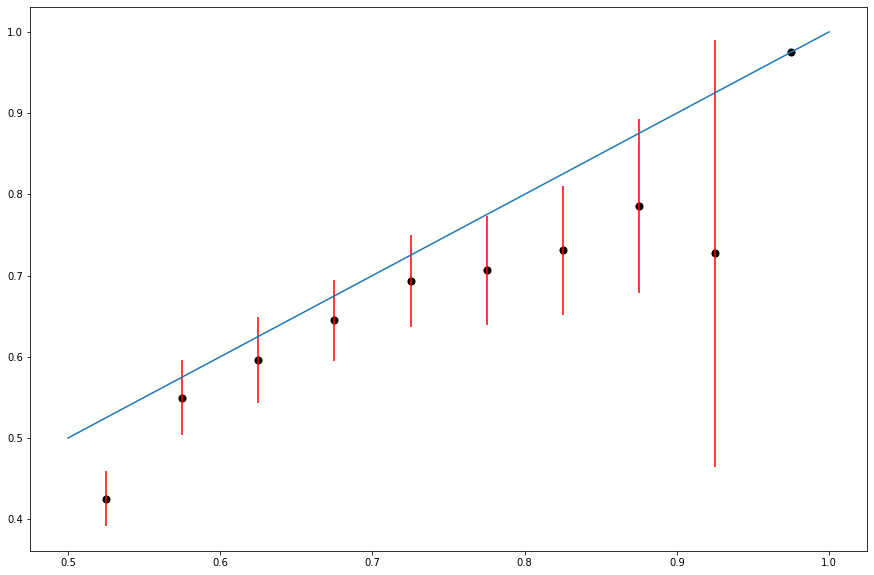

gameRating/records/tennis/algorithm2_test_both.txt


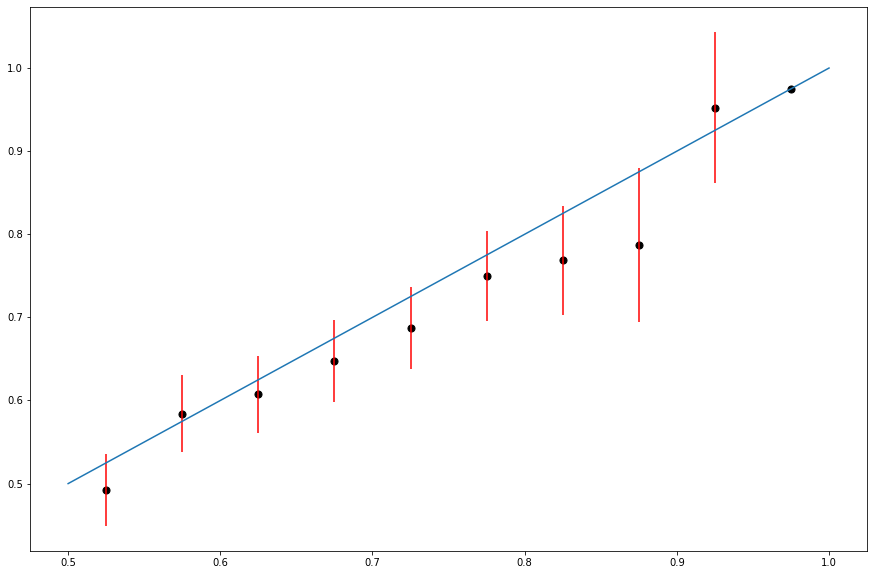

In [ ]:
string = ['algorithm2_test_only.txt', 'algorithm2(conserative)_test_only.txt', 'algorithm2_test_both.txt']

for s in string:
    filename = path+s
    print(filename)
    filenamepng = 'cali_'+s+'.png'
    filenamecsv = 'cali_'+s+'.csv'
    data = pd.read_csv(filename, sep=', ', engine='python')
    p = np.array(data['phat'])

    fig, ax = plt.subplots(figsize=(15,10))
    ax.plot([.5,1],[.5,1]) # x = y
    a=.5
    number = []
    acc = []

    for _ in range(10): 
        b = round(a+.05, 2)  
        mid = (a+b)/2
        L, U, n = get_CI(p,a,b)
        number.append(n)
        acc.append((L+U)/2)
        ax.scatter(mid,(L+U)/2, s = 50, color= "black")
        ax.vlines(mid, L, U,color= "red") # line segment of CI
        a = b

    plt.savefig(filenamepng)
    plt.show()

    calib = pd.DataFrame({'number':number, 'acc':acc})
    calib.to_csv(filenamecsv,index=False)

# end

In [ ]:
# os.chdir('../')
# !zip -r filename.zip Mar15

  adding: Mar15/ (stored 0%)
  adding: Mar15/calibration_algorithm2_only.png (deflated 18%)
  adding: Mar15/calibration_algorithm3_only.csv (deflated 40%)
  adding: Mar15/calibration_algorithm2_both.png (deflated 19%)
  adding: Mar15/calibration_algorithm3_both.png (deflated 18%)
  adding: Mar15/calibration_algorithm2_only.csv (deflated 46%)
  adding: Mar15/calibration_algorithm3_both.csv (deflated 37%)
  adding: Mar15/calibration_algorithm2_both.csv (deflated 41%)
  adding: Mar15/calibration_algorithm3_only.png (deflated 19%)


# graph

/content/Mar15


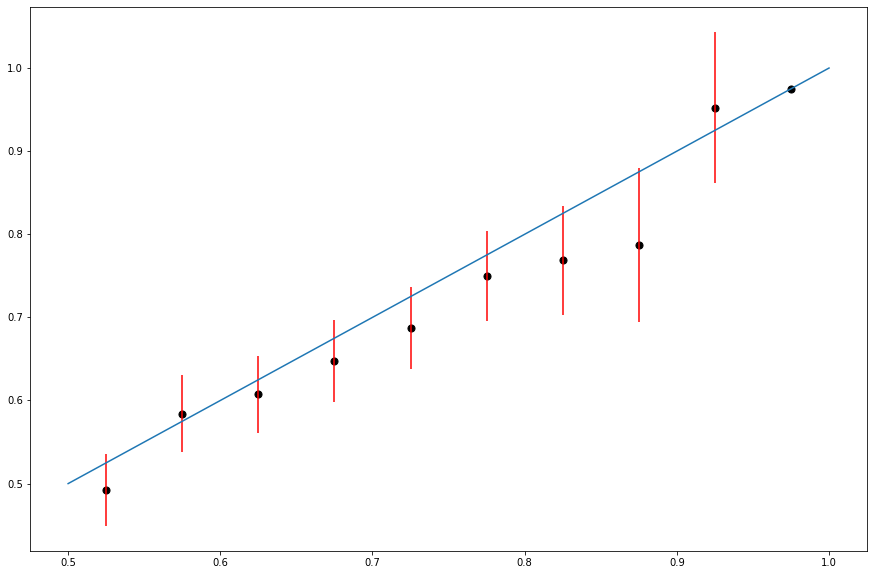

,size_2b,acc_hat_2b
0,512,0.492188
1,435,0.583908
2,428,0.607477
3,360,0.647222
4,336,0.687500
5,244,0.750000
6,160,0.768750
7,75,0.786667
8,21,0.952381
9,0,0.975000


In [ ]:
# 2 
# both
fig, ax = plt.subplots(figsize=(15,10))

ax.plot([.5,1],[.5,1]) # x = y
a=.5
size_2b = []
acc_hat_2b = []
for _ in range(10):
  b = round(a+.05, 2)
  mid = (a+b)/2
  L, U, n = get_CI(phat2b,a,b)
  size_2b.append(n)
  acc_hat_2b.append((L+U)/2)
  # if n!=0:
  ax.scatter(mid,(L+U)/2, s = 50, color= "black")
  ax.vlines(mid, L, U,color= "red") # line segment of CI
  a = b
plt.savefig('calibration_algorithm2_both.png')
plt.show()

callib_2b = pd.DataFrame({'size_2b':size_2b, 'acc_hat_2b':acc_hat_2b})
callib_2b.to_csv('calibration_algorithm2_both.csv',index=False)
callib_2b

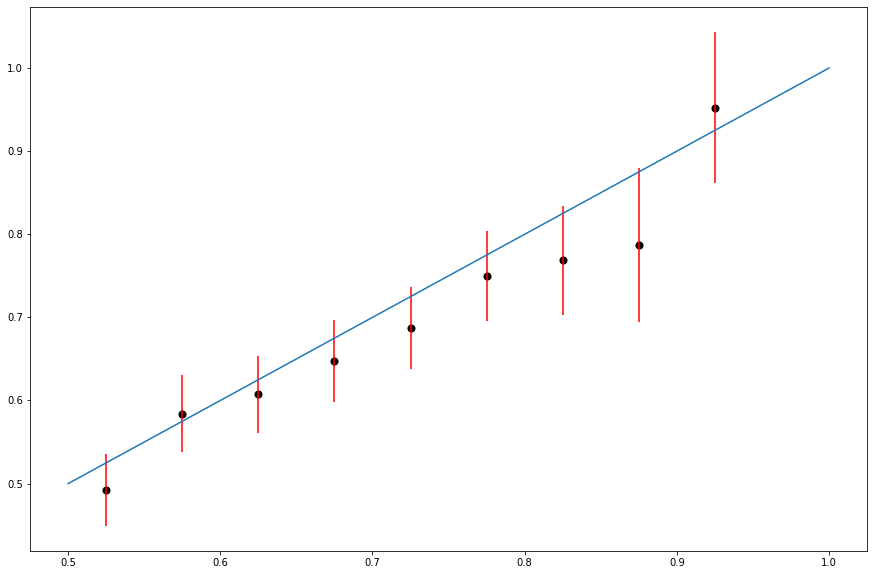

,size_2b,acc_hat_2b
0,512,0.492188
1,435,0.583908
2,428,0.607477
3,360,0.647222
4,336,0.687500
5,244,0.750000
6,160,0.768750
7,75,0.786667
8,21,0.952381
9,0,0.975000


In [ ]:
# 2 
# both
fig, ax = plt.subplots(figsize=(15,10))

ax.plot([.5,1],[.5,1]) # x = y
a=.5
size_2b = []
acc_hat_2b = []
for _ in range(10):
  b = round(a+.05, 2)
  mid = (a+b)/2
  L, U, n = get_CI(phat2b,a,b)
  size_2b.append(n)
  acc_hat_2b.append((L+U)/2)
  if n!=0:
    ax.scatter(mid,(L+U)/2, s = 50, color= "black")
    ax.vlines(mid, L, U,color= "red") # line segment of CI
  a = b
plt.savefig('calibration_algorithm2_both.png')
plt.show()

callib_2b = pd.DataFrame({'size_2b':size_2b, 'acc_hat_2b':acc_hat_2b})
callib_2b.to_csv('calibration_algorithm2_both.csv',index=False)
callib_2b

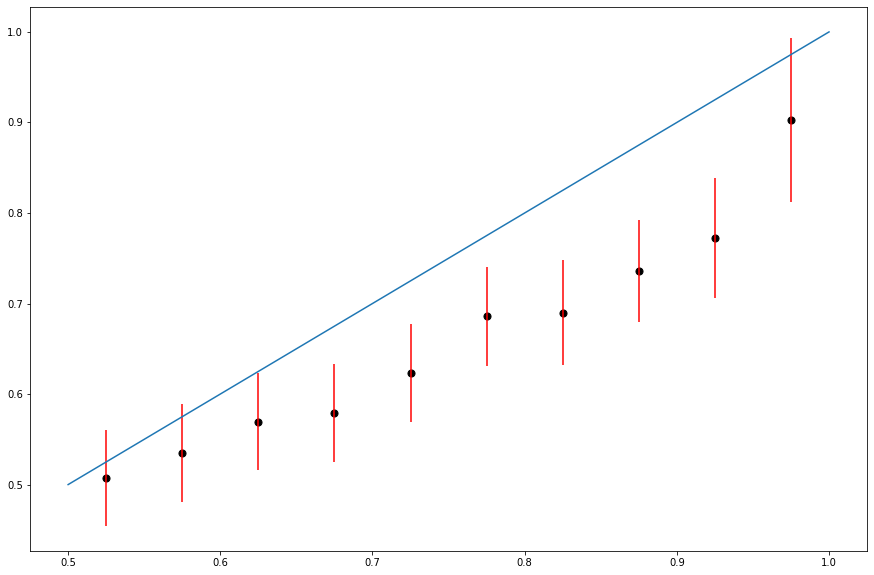

In [ ]:
# 2 
# only
fig, ax = plt.subplots(figsize=(15,10))

ax.plot([.5,1],[.5,1]) # x = y
a=.5
size_2o = []
acc_hat_2o = []
for _ in range(10):
  b = round(a+.05, 2)
  mid = (a+b)/2
  L, U, n = get_CI(phat2o,a,b)
  size_2o.append(n)
  acc_hat_2o.append((L+U)/2)
  ax.scatter(mid,(L+U)/2, s = 50, color= "black")
  ax.vlines(mid, L, U,color= "red") # line segment of CI
  a = b

plt.savefig('calibration_algorithm2_only.png')
plt.show()

callib_2o = pd.DataFrame({'size_2o':size_2o, 'acc_hat_2o':acc_hat_2o})
callib_2o.to_csv('calibration_algorithm2_only.csv',index=False)


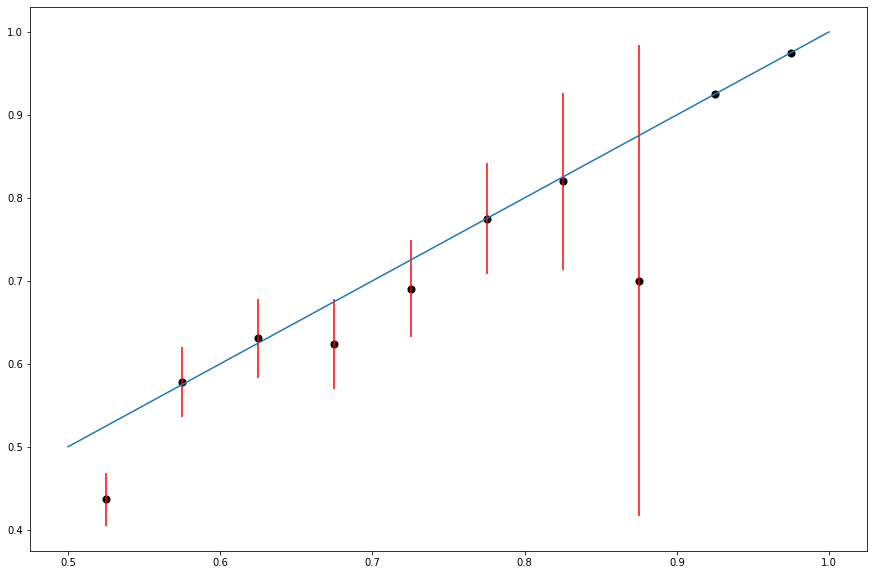

,size_3b,acc_hat_3b
0,907,0.436604
1,521,0.577735
2,387,0.630491
3,306,0.624183
4,239,0.690377
5,151,0.774834
6,50,0.820000
7,10,0.700000
8,0,0.925000
9,0,0.975000


In [ ]:
# 3
# both
fig, ax = plt.subplots(figsize=(15,10))

ax.plot([.5,1],[.5,1]) # x = y
a=.5
size_3b = []
acc_hat_3b = []
for _ in range(10):
  b = round(a+.05, 2)
  mid = (a+b)/2
  L, U, n = get_CI(phat2cb,a,b)
  size_3b.append(n)
  acc_hat_3b.append((L+U)/2)
  ax.scatter(mid,(L+U)/2, s = 50, color= "black")
  ax.vlines(mid, L, U,color= "red") # line segment of CI
  a = b
plt.savefig('calibration_algorithm3_both.png')
plt.show()

callib_3b = pd.DataFrame({'size_3b':size_3b, 'acc_hat_3b':acc_hat_3b})
callib_3b.to_csv('calibration_algorithm3_both.csv',index=False)
callib_3b

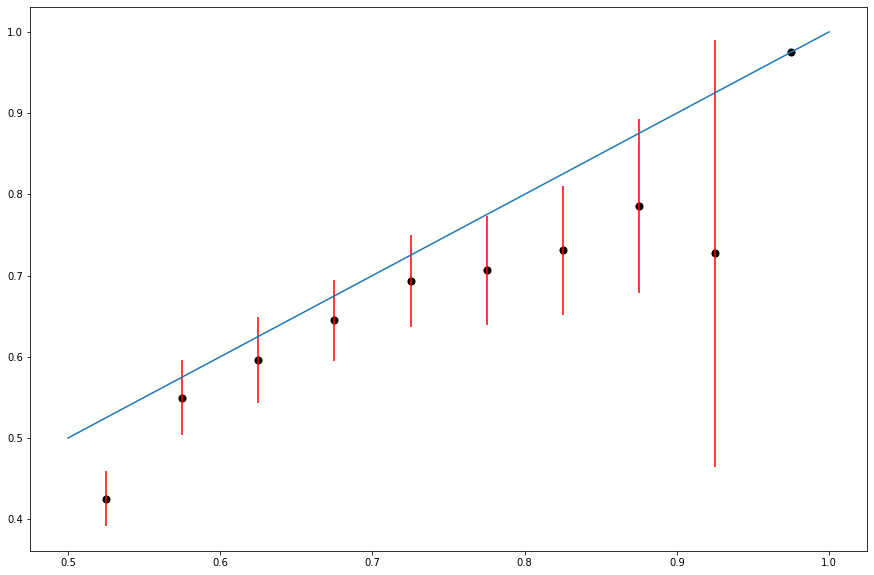

In [ ]:
# 3  #2(conservative)
# only
fig, ax = plt.subplots(figsize=(15,10))

ax.plot([.5,1],[.5,1]) # x = y
a=.5
size_3o = []
acc_hat_3o = []
for _ in range(10):
  b = round(a+.05, 2)
  mid = (a+b)/2
  L, U, n = get_CI(phat2co,a,b)
  size_3o.append(n)
  acc_hat_3o.append((L+U)/2)
  ax.scatter(mid,(L+U)/2, s = 50, color= "black")
  ax.vlines(mid, L, U,color= "red") # line segment of CI
  a = b
plt.savefig('calibration_algorithm3_only.png')
plt.show()

callib_3o = pd.DataFrame({'size_3o':size_3o, 'acc_hat_3o':acc_hat_3o})
callib_3o.to_csv('calibration_algorithm3_only.csv',index=False) #
